# 5 Number Summaries
A five number summary is a simple way to understand the main features of a dataset by looking at just five key values. These five numbers are the minimum (smallest value), first quartile (25th percentile), median (middle value), second quartile (75th percentile), and maximum (largest value). Together, these numbers show you the spread and center of your data, making it easy to spot outliers and understand the overall distribution. The five number summary is especially useful because it gives you a quick snapshot of your data. For example, if you have test scores from a class, the five number summary would tell you the lowest score, highest score, middle score, and the scores that divide the bottom 25% and top 25% from the rest.

### Example

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Generate random student test score data
np.random.seed(42)
student_scores = np.random.normal(loc=78, scale=12, size=50)
student_scores = np.clip(student_scores, 0, 100)

In [5]:
# Create a DataFrame that contains random student test data
df = pd.DataFrame({
    'Student_ID': range(1, 51),
    'Test_Score': student_scores
})

In [7]:
# Create a 5 number summary using 'describe'
df['Test_Score'].describe()

count     50.000000
mean      75.289766
std       11.193742
min       54.483959
25%       67.668251
50%       75.190258
75%       82.035307
max      100.000000
Name: Test_Score, dtype: float64

# Tips for Interpreting 5 Number Summaries

- **Check the Spread (Range)**:
Look at the difference between min and max to understand the variability in your data. A large range might suggest that outliers are present, while a small range suggests the data points are more similar to one another.

- **Compare Mean vs. Median**:
If the mean is much higher than the median, your data is likely right-skewed (pulled up by high values). If the mean is much lower than the median, it's left-skewed (pulled down by low values). When they're close, the data is fairly symmetric.

- **Examine the Quartile Distances**:
Calculate the difference between Q1 and Q2, and Q3 and Q2. If these differences are similar, your data is fairly symmetric. If one difference is much larger, then more of your data is concentrated there!

- **Identify Potential Outliers**:
Values that fall far outside the range between Q1 and Q3 might be outliers. A rule of thumb to memorize: anything more than 1.5 times the interquartile range (Q3-Q1) beyond the quartiles is suspicious.

- **Consider Context**:
Always interpret numbers within the context of what you're measuring. A 20-point range might be huge for test scores (0-100 scale) but tiny for house prices ($100,000s).

- **Look for Practical Implications**:
Ask yourself: What do these numbers mean for real-world decisions? Are there concerning patterns, like too many low performers or unexpected high values?

- **Visualize It**:
The five number summary maps perfectly to a box plot, which can help you see these patterns visually and spot outliers more easily. Keep reading to learn how to make a box plot!

### Interpreting the Test Score 5 Number Summary

The class of 50 students performed reasonably well, with an average score of about 75 points. The median of 75.2 is very close to the mean, which suggests the scores are fairly normally distributed without major skewing. There's a 45-point spread between the lowest score (54.5) and highest score (100), which means at least one student got a perfect score on this exam. About 25% of students scored below 67.7, half scored below 75.2, and 75% scored below 82. This means the middle 50% of students (between the first and third quartiles) scored between 67.7 and 82 points. 

The minimum score of 54.5 might indicate a student who needs extra help, while the maximum of 100 shows at least one student mastered the material completely! The standard deviation of 11.2 points shows there's moderate variation in performance. No students scored three standard deviations above or below the mean, which suggests that no major outliers are found in the test scores. Overall, this looks like a typical class distribution with most students performing around the C+ (75-points) range.

# Box Plots

A box plot, also called a box-and-whisker plot, is a visual representation of the five number summary that makes it easy to see the distribution and spread of your data at a glance. The plot consists of a rectangular box that spans from the first quartile (Q1) to the third quartile (Q3), with a line inside the box marking the median. The "whiskers" are lines that extend from the box to the minimum and maximum values, showing the full range of the data. Box plots are particularly useful because they clearly highlight outliers as individual dots beyond the whiskers, and they make it simple to compare multiple groups of data side by side. For example, if you wanted to compare test scores across different classes, you could create box plots for each class and immediately see which class had higher median scores, more variability, or unusual outliers.

### Example

In [16]:
# Create two  different classes of test scores
np.random.seed(42)

# Class A: High-performing class
class_a_scores = np.random.normal(loc=85, scale=8, size=40)
class_a_scores = np.clip(class_a_scores, 0, 100)

# Class B: Struggling class
class_b_scores = np.random.normal(loc=65, scale=15, size=35)
class_b_scores = np.clip(class_b_scores, 0, 100)

In [23]:
# Create separate DataFrames for each class
df_class_a = pd.DataFrame({
    'Student_ID': range(1, len(class_a_scores) + 1),
    'Test_Score': class_a_scores
})

df_class_b = pd.DataFrame({
    'Student_ID': range(1, len(class_b_scores) + 1),
    'Test_Score': class_b_scores
})

<Axes: xlabel='Test_Score', ylabel='Count'>

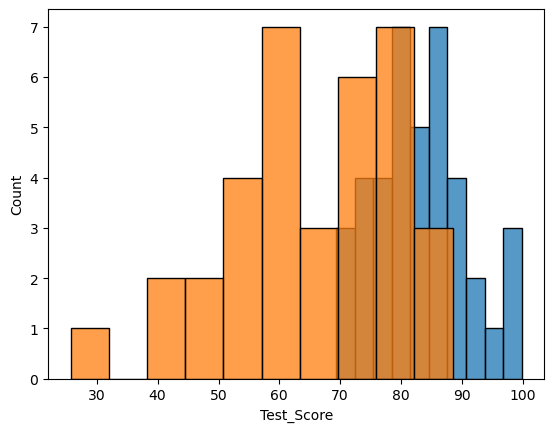

In [24]:
# Create an overlaid histogram
sns.histplot(data=df_class_a, x='Test_Score', bins=10)
sns.histplot(data=df_class_b, x='Test_Score', bins=10)

<Axes: ylabel='Test_Score'>

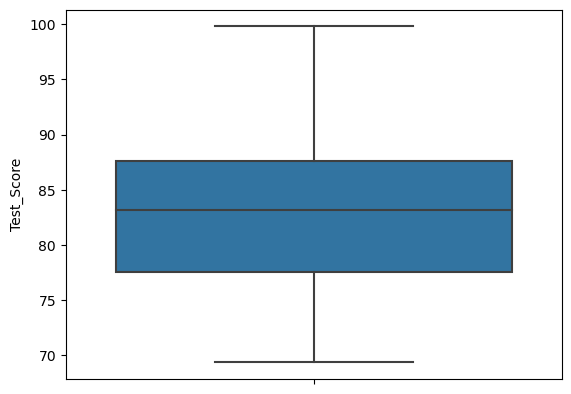

In [32]:
# Create a box plot for class A
sns.boxplot(data=df_class_a, y='Test_Score')

<Axes: ylabel='Test_Score'>

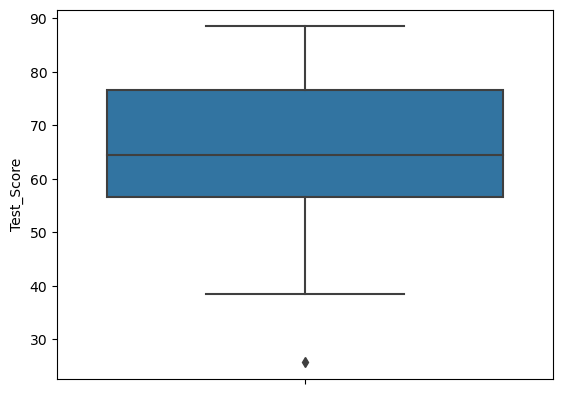

In [33]:
# Create a box plot for class B
sns.boxplot(data=df_class_b, y='Test_Score')

<Axes: xlabel='Class', ylabel='Test_Score'>

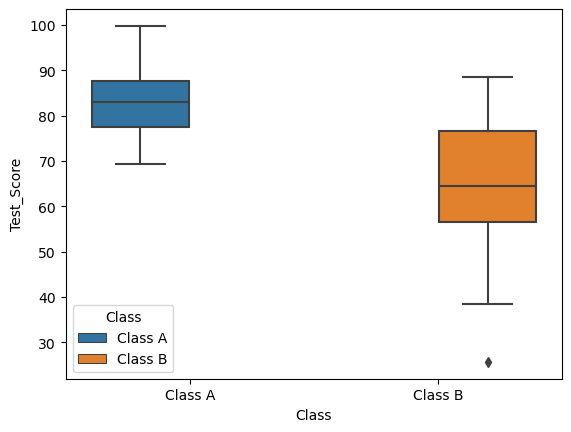

In [31]:
# It's hard to compare box plots when they're not side-by-side! 
# Combine the class dataframes and then make a boxplot using the hue argument

# Combine
df_class_a['Class'] = 'Class A'
df_class_b['Class'] = 'Class B'
df_combined = pd.concat([df_class_a, df_class_b], ignore_index=True)

# Make new boxplot with combined dataframe
sns.boxplot(data=df_combined, x='Class', y='Test_Score', hue="Class")

# Tips for Interpreting Box Plots
- **Start with the Box (Middle 50% of Data)**:
The box represents the interquartile range (IQR) from Q1 to Q3, containing the middle 50% of your data. A tall box means more variability in the middle range, while a short box indicates data clustered tightly around the median.

- **Check the Median Line Position**:
If the median line is centered in the box, your data is fairly symmetric. If it's closer to the bottom of the box, you have right skew (more extreme high values). If it's near the top, you have left skew (more extreme low values).


- **Examine the Whiskers**:
The whiskers extend to the most extreme values within 1.5 times the IQR from the box edges. Long whiskers indicate a wide spread of data, while short whiskers suggest data is concentrated near the quartiles.


- **Identify Outliers**:
Individual dots beyond the whiskers are potential outliers. A few outliers might be normal, but many outliers could indicate data quality issues or a different underlying distribution than expected.


- **Compare Whisker Lengths**:
Unequal whisker lengths often indicate skewness. A longer upper whisker suggests right skew, while a longer lower whisker suggests left skew.


- **Look for Multiple Groups**:
When comparing box plots side by side, focus on differences in median positions, box heights, and overall ranges. Non-overlapping boxes usually indicate significantly different groups.


- **Consider the Context and Scale**:
Always interpret the ranges and medians relative to your measurement scale. A 15-point difference might be huge for test scores (0-100) but tiny for salaries ($1000s).

### Interpreting the Test Score Box Plots
Examine the box plots for these two classes and you will see that the two classes performed differently on the test. Class A (blue) did really well, with a median score around 84 points! That's an average score of a B! Additionally, the middle 50% of Class A's students scored within a 10-point range. The short whiskers and absence of outliers suggest that all students in Class A performed at a consistently high level with minimal variation in performance. 

In contrast, Class B (orange) shows significantly lower performance with a median around 65 points. That is almost 20 points below Class A's median! Additionally, the large box height tells us that the middle 50% of Class B students span a much wider scoring range than Class A's students. The long whiskers show that some students scores were similar to Class A's lower performers, while others scored significantly lower than Class A's poorest performers. There is a concerning outlier in Class B at approximately 25 points, representing a student who performed far below their classmates. 

This comparison suggests that Class A represents a well-prepared group of high achievers, while Class B appears to be a class with a mix of struggling students, average performers, and a few higher achievers. Looking at this data suggests that Class B needs more targeted support for its underperforming students.

# Now, include a five number summary and box plot in your Pokemon project. You may need to revise your question so that it requires these statistical tools to answer. 